# THE SPARKS FOUNDATION 
## GRADUATE ROTATIONAL INTERNSHIP PROGRAM
## DATA SCIENCE AND BUSINESS ANALYTICS

### Task 6 : Prediction using Decision Tree Algorithm
### Author: Abdullah Ficici 

**Business context.** As a data scientist/analysts, build a model to predict the right Iris Species classes.

**Problem statement.** Create the Decision Tree classifier and visualize it graphically.

**Analytical context.** The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import metrics

# Ignore the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Data

In [2]:
iris = pd.read_csv('iris.csv')
print("Data imported successfully")

Data imported successfully


### Explore the Data

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.shape

(150, 6)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Check for Missing Values

In [7]:
((iris.isnull().sum()/len(iris))*100).sort_values(ascending=False)

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.describe(include='object')

,Species
count,150
unique,3
top,Iris-versicolor
freq,50


### Visualization

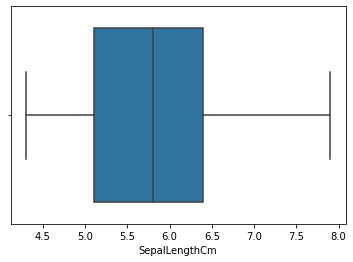

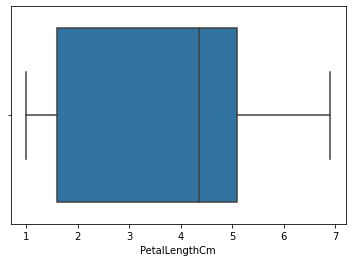

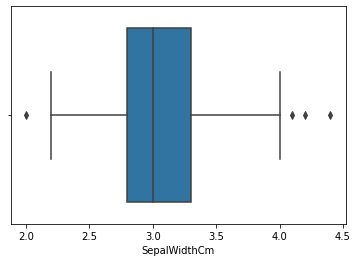

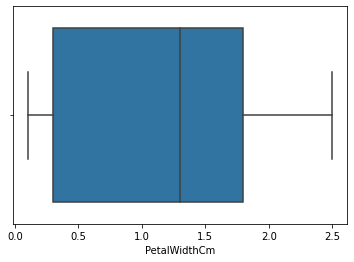

In [10]:
# Outliers Check
sns.boxplot(iris['SepalLengthCm'])
plt.show()
sns.boxplot(iris['PetalLengthCm'])
plt.show()
sns.boxplot(iris['SepalWidthCm'])
plt.show()
sns.boxplot(iris['PetalWidthCm'])
plt.show()

### Correlation Heatmap

In [11]:
corr = iris.corr()

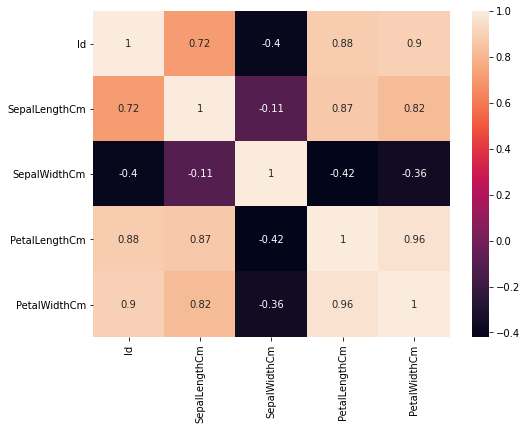

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

### Pairplot

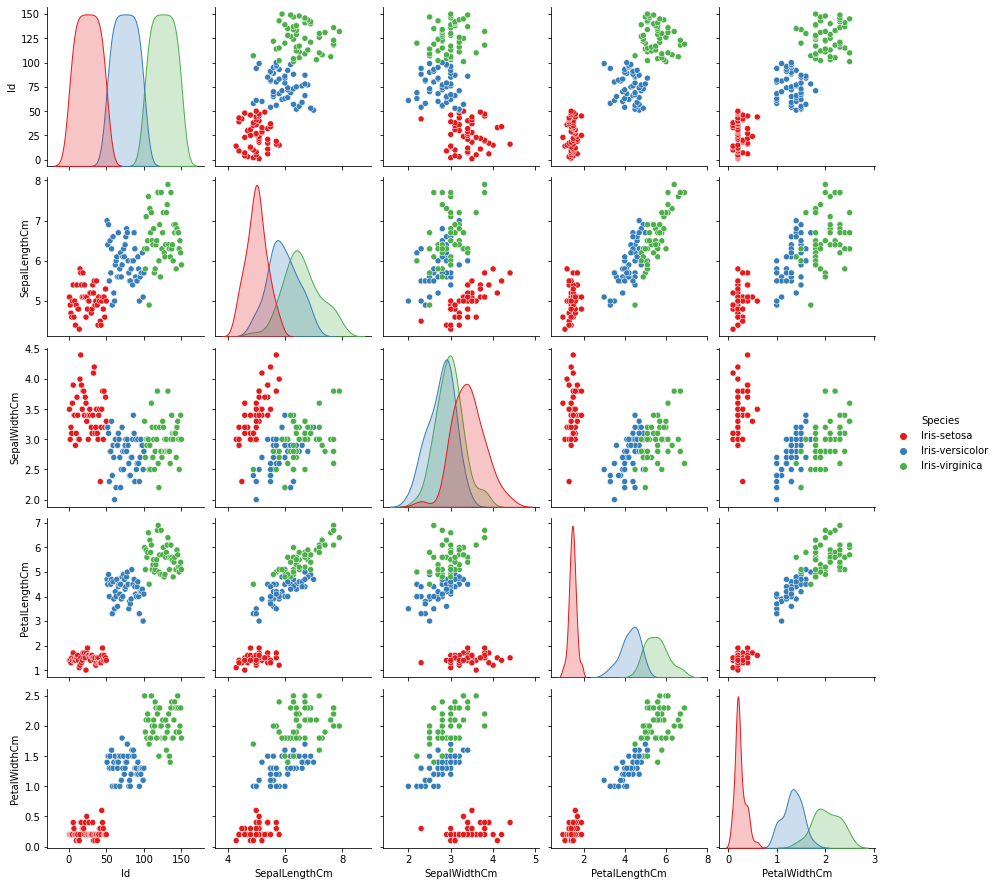

In [13]:
sns.pairplot(iris, hue="Species", palette="Set1")
plt.show()

In [14]:
iris['Species'] = preprocessing.LabelEncoder().fit_transform(iris['Species'])

### Split the Data into Train and Test Sets

In [15]:
X = iris.iloc[:, 1:5].values
y = iris.iloc[:, -1].values

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3, random_state=0)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [18]:
# Train the Decission Tree Classificatiom Model

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

print("Decision Tree Classification Model trained.")

Decision Tree Classification Model trained.


### Visualization

In [19]:
Tree = tree.DecisionTreeClassifier()
Tree = Tree.fit(X_train,y_train)

In [20]:
txtgraph = tree.export_text(Tree)
print(txtgraph)

|--- feature_2 <= -0.78
|   |--- class: 0
|--- feature_2 >  -0.78
|   |--- feature_3 <= 0.70
|   |   |--- feature_2 <= 0.71
|   |   |   |--- feature_3 <= 0.57
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.57
|   |   |   |   |--- feature_1 <= -0.75
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  -0.75
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  0.71
|   |   |   |--- class: 2
|   |--- feature_3 >  0.70
|   |   |--- feature_2 <= 0.60
|   |   |   |--- feature_0 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.08
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  0.60
|   |   |   |--- class: 2



[Text(446.40000000000003, 747.4499999999999, 'X[2] <= -0.783\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(334.8, 611.55, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(558.0, 611.55, 'X[3] <= 0.701\ngini = 0.498\nsamples = 66\nvalue = [0, 31, 35]'),
 Text(334.8, 475.65, 'X[2] <= 0.711\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(223.20000000000002, 339.74999999999994, 'X[3] <= 0.573\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(111.60000000000001, 203.8499999999999, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(334.8, 203.8499999999999, 'X[1] <= -0.746\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(223.20000000000002, 67.94999999999993, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(446.40000000000003, 67.94999999999993, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(446.40000000000003, 339.74999999999994, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(781.2, 475.65, 'X[2] <= 0.6\ngini = 0.059\nsamples = 33\

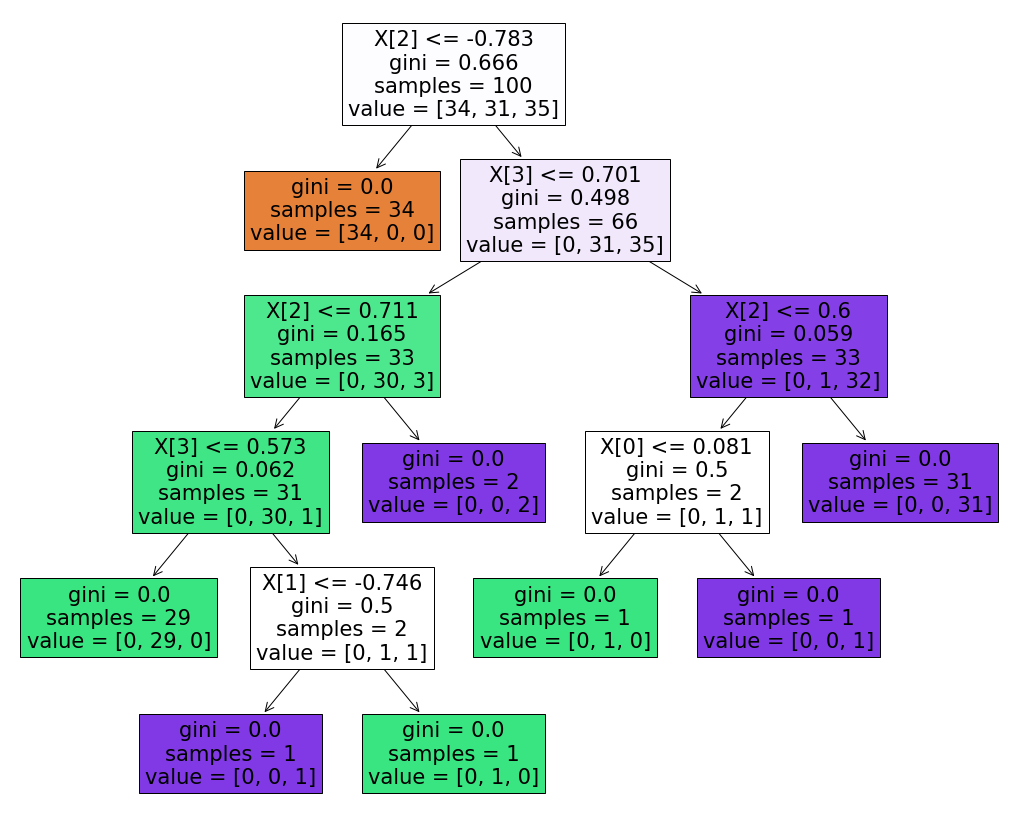

In [21]:

plt.figure(figsize=(18,15))
plot_tree(Tree, filled=True, impurity=True)

### Accuracy Check

In [22]:
print("The shape of Train and Test sets:\n")
print('X_train \t :', X_train.shape)
print('X_test  \t :', X_test.shape)
print('y_train \t :', y_train.shape)
print('y_test  \t :', y_test.shape)

The shape of Train and Test sets:

X_train 	 : (100, 4)
X_test  	 : (50, 4)
y_train 	 : (100,)
y_test  	 : (50,)


In [23]:
Y_pred = classifier.predict(X_test)
Y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2])

In [24]:
iris_2 = pd.DataFrame({"Actual":y_test,"Predicted":Y_pred})
iris_2.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


In [25]:
print("Accuracy Score : ", np.mean(Y_pred == y_test))

Accuracy Score :  0.98


### Confusion Matrix

In [26]:
cm = confusion_matrix(y_test, Y_pred)
cm

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 15]])

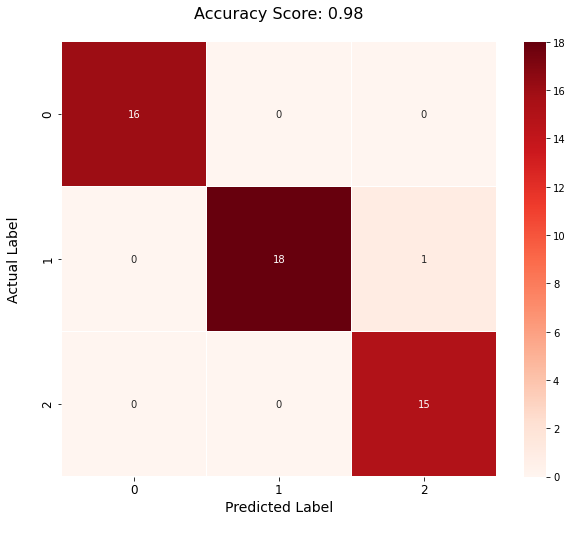

In [27]:
Score = np.mean(Y_pred == y_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True, fmt='.0f', linewidths=0.5, square = True, cmap = 'Reds');
plt.title(f"Accuracy Score: {Score}\n", size=16);
plt.xlabel('Predicted Label\n', fontsize = 14);
plt.ylabel('Actual Label\n', fontsize = 14);
plt.tick_params(labelsize=12)
plt.show()


### Classification Report

In [28]:
report = metrics.classification_report(y_test, classifier.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Accuracy Score: 
#### The model can predict the righ Iris Species classes with 98% Accuracy 